# Read single-trial EEG epochs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from spudtr import get_demo_df, P3_F
from spudtr import epf

In [2]:
epochs_df = get_demo_df(P3_F)

# specify the epoch_id, time stamps and columns with EEG data
eeg_channels = ['MiPf', 'MiCe', 'MiPa', 'MiOc', 'A2']

# check the epochs format
epf.check_epochs(epochs_df, eeg_channels, epoch_id="epoch_id", time="time_ms")

# preview the entire dataframe
epochs_df

/home/turbach/miniconda3/envs/mckonda_spudtr_dev/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-16.281250,11.812500,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-18.468750,9.843750,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-18.703125,7.875000,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-12.875000,4.675781,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-7.531250,6.398438,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,-2.914062,-3.445312,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,-3.644531,-3.691406,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,-3.644531,-3.937500,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,-3.644531,-3.691406,-4.406250,-3.412109,-3.886719


# Common A1 to average mastoid reference

a.k.a. "bimastoid", "linked mastoid"

> Warning, only valid for EEG recorded with a common A1 reference 

In [3]:
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'A2', 
    "linked_pair",
    epoch_id="epoch_id", time="time_ms",
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-22.187500,5.906250,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-23.390625,4.921875,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-22.640625,3.937500,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-15.212891,2.337891,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-10.730469,3.199219,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,-1.191406,-1.722656,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,-1.798828,-1.845703,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,-1.675781,-1.968750,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,-1.798828,-1.845703,-4.406250,-3.412109,-3.886719


# New common reference

> Note: Only valid for common reference EEG data.

For example change from common A1 reference to a vertex or nose tip common reference.

Note: new the new reference = 0 as expected.

In [4]:
# vertex location is MiCe
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'MiCe',
    "new_common", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-27.406250,0.687500,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-28.835938,-0.523438,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-25.281250,1.296875,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-17.933594,-0.382812,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-15.625000,-1.695312,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,1.132812,0.601562,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,0.402344,0.355469,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,0.402344,0.109375,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,0.402344,0.355469,-4.406250,-3.412109,-3.886719


# Common average reference

Note: for demonstration only, a real application would use all scalp locations

In [5]:
reference_channels = ["MiPf", "MiCe", "MiPa", "MiOc", "A2"]
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    reference_channels ,
    "common_average", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-10.834375,17.259375,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-11.557813,16.754688,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-9.076563,17.501562,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-2.956250,14.594531,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-0.729688,13.200000,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,0.482812,-0.048438,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,-0.004688,-0.051563,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,0.044531,-0.248437,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,-0.004688,-0.051563,-4.406250,-3.412109,-3.886719


# Center EEG data in an interval (baseline)

> The `start` and `stop` interval units are the same as the time channel

In [6]:
start = -500
stop = -4
epf.center_eeg(
    epochs_df, 
    eeg_channels, 
    start, 
    stop, 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-21.966492,2.651713,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-24.153992,0.682963,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-24.388367,-1.285787,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-18.560242,-4.485005,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-13.216492,-2.762349,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,-2.935799,-3.411574,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,-3.666268,-3.657668,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,-3.666268,-3.903761,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,-3.666268,-3.657668,-4.406250,-3.412109,-3.886719


# Exclude previously tagged artifacts

This special-purpose filter drops entire epochs where the time-locking event at time 0 is tagged as bad for some reason on the specified `bads_column`. 

This implements a simple convention for pruning epochs based on tags generated by artifact screening functions.

Any column can be used or constructed for this purpose.

Example: drop all epochs where `eeg_artifact` is other than 0 at `time_ms` == 0 

In [7]:
good_epochs = epf.drop_bad_epochs(
    epochs_df, 
    bads_column="eeg_artifact",
    epoch_id='epoch_id', 
    time='time_ms',
)

print("Total number of epoch ids: ", len(epochs_df["epoch_id"].unique()))
print("Number of good epoch ids: ", len(good_epochs["epoch_id"].unique()))
good_epochs

Total number of epoch ids:  600
Number of good epoch ids:  542


,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,match_group,ccode,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-1500,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,21.859375,8.140625,-11.179688,-9.343750,-16.281250,11.812500,82.250000,-32.656250,38.375000
1,0,-1496,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-11.312500,18.593750,6.660156,-12.671875,-8.359375,-18.468750,9.843750,86.625000,-31.203125,38.875000
2,0,-1492,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-12.296875,13.820312,4.195312,-11.921875,-7.378906,-18.703125,7.875000,87.875000,-38.531250,37.406250
3,0,-1488,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-8.117188,8.039062,4.687500,-8.195312,-1.721680,-12.875000,4.675781,86.625000,-51.687500,34.000000
4,0,-1484,sub000,0,sub000/dblock_0,0,0,250.0,1,1,...,-1.475586,4.773438,9.125000,-3.726562,1.967773,-7.531250,6.398438,87.625000,-49.718750,31.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,600,1480,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.689453,-3.265625,-3.453125,-3.228516,-3.935547,-2.914062,-3.445312,-3.916016,-2.925781,-3.886719
449996,600,1484,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-3.767578,-3.453125,-3.478516,-4.425781,-3.644531,-3.691406,-4.648438,-3.412109,-3.886719
449997,600,1488,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.935547,-4.019531,-3.701172,-3.726562,-4.425781,-3.644531,-3.937500,-4.406250,-3.412109,-3.886719
449998,600,1492,sub000,0,sub000/dblock_4,0,0,250.0,1,0,...,-3.443359,-3.767578,-3.453125,-3.726562,-4.425781,-3.644531,-3.691406,-4.406250,-3.412109,-3.886719


# Filter EEG epochs (keep distorted edges)

1. Design the filter

lowpass filter
sampling rate (samples / s): 250.00000
1/2 amplitude cutoff (Hz): 20.00000
transition width (Hz): 5.00000
ripple (dB): 53.00000
window: kaiser
length (coefficients): 159
delay (samples): 79
edge distortion: first and last 0.3160 seconds of the data(= 79 samples at 250.0 samples / s)


ValueError: filter I/O length mismatch: input=50 output=0

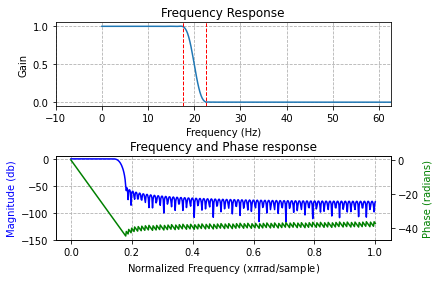

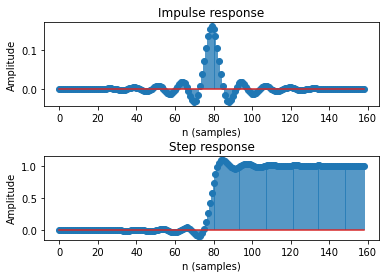

In [8]:
from spudtr import filters

lp_specs = {
    "cutoff_hz": 20,     # 1/2 amplitude frequency Hz
    "width_hz": 5.0,      # width of the transition band from pass Hz to stop  Hz
    "ripple_db": 53,     # allowable ripple in the pass band, large numbers = less ripple
    "sfreq": 250.0,      # sampling rate in samples/second
    "ftype": "lowpass",  # lowpass, bandpass, highpass
    "window": "kaiser",  # window kaiser, blackman, hamming, ...
}

bode, imp, s_edge, n_edge = filters.show_filter(**lp_specs);  # expand the dictionary with python ** trick

2. apply the filter

In [ ]:
epochs_df_lp = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=False,
    **lp_specs,
    )

times = epochs_df["time_ms"].unique()
epoch_ids = epochs_df["epoch_id"].unique()

3. Compare the output

# Filter EEG epochs, trim distorted edges

In [ ]:
epochs_df_lp_trimmed = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=True,
    **lp_specs,
    )

trimmed_times = epochs_df_lp_trimmed["time_ms"].unique()

Compare the output

In [ ]:
# select some epochs to show
epidxs = [0, 6, 20]
channel = "MiPa"

for epidx in epidxs:

    qstr = f"epoch_id == @epoch_ids[{epidx}]"
    f, ax = plt.subplots(figsize=(12,8))
    ax.set_title(f"epoch_id={epidx}",  fontsize=18)
    
    # unfiltered
    ax.plot(
        times,
        epochs_df.query(qstr)[channel],
        color="black", 
        label="unfiltered"
    )
    
    # filtered, phase compensated with distortion
    ax.plot(
        times,
        epochs_df_lp.query(qstr)[channel],
        color="red", 
        label="filtered"
    )
    
    # filtered, phase compensated, distortion trimmed
    ax.plot(
        trimmed_times,
        epochs_df_lp_trimmed.query(qstr)[channel], 
        color="blue", 
        lw=3, 
        label="filtered, trimmed"
    )

    # decorate the beginning and end of the delay shift distortion regions
    for xtime in [trimmed_times[0], trimmed_times[-1]]:
        
        # beginning and end of the trimmed data
        ax.axvline(xtime, color="red")
        ax.annotate(
            s=f"{str(xtime)} ms", 
            xy=(xtime, ax.get_ylim()[1]), 
            fontsize=18, 
            ha="center", 
            va="bottom",
            bbox=dict(boxstyle="round", ec="red",fc="white")
        )
            
        # highlight the trimmed region
        for bound in [0, -1]:
            ax.axvspan(
                times[bound], 
                trimmed_times[bound], 
                color="pink", 
                alpha=.2
            )
    
    ax.legend()

# Tip: **epoch_specs

Since the epoch_id and time columns are used over and over, set them once early as a dictionary and use the python `**` dictionary expansion trick when running `epf` functions.

In [ ]:
epoch_specs = dict(epoch_id = "epoch_id", time="time_ms")
epf.check_epochs(epochs_df, eeg_channels, **epoch_specs)